In [1]:
import pandas as pd
from google.colab import files
import datetime
from pandas_datareader import data as pdr
import io
import yfinance as yfin
import matplotlib.pyplot as plt
import random



In [2]:
uploaded = files.upload()

Saving SampleESGScores_Company_Refinitiv.csv to SampleESGScores_Company_Refinitiv.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['SampleESGScores_Company_Refinitiv.csv']))
df.head()

,OrgID,FisYear,CDFlag,overall_score,econ_score,envrn_score,lenvrnmntl,corpgov_score,social_score,feeddate,...,Asset4Id,OrgName,BusTRBCId,PrimExchg,StatusFlag,OAId,tick,Cusip,Sedol,Isin
0,10397,2007,40000000000,0.911297,0.974768,0.950650,NaN,0.415402,0.934635,11/15/2020,...,A4_01127,Bayerische Motoren Werke AG,5310,ETR,1,4295869227,BAYER,NaN,575602,DE0005190003
1,10397,2008,40000000000,0.931259,0.823553,0.943566,NaN,0.646088,0.961887,11/15/2020,...,A4_01127,Bayerische Motoren Werke AG,5310,ETR,1,4295869227,BAYER,NaN,575602,DE0005190003
2,10397,2015,40000000000,0.915647,0.887154,0.951170,NaN,0.602995,0.956482,11/15/2020,...,A4_01127,Bayerische Motoren Werke AG,5310,ETR,1,4295869227,BAYER,NaN,575602,DE0005190003
3,10397,2016,40000000000,0.935250,0.938826,0.953786,NaN,0.726017,0.915904,11/15/2020,...,A4_01127,Bayerische Motoren Werke AG,5310,ETR,1,4295869227,BAYER,NaN,575602,DE0005190003
4,10397,2014,40000000000,0.940717,0.940931,0.947719,NaN,0.743696,0.888044,11/15/2020,...,A4_01127,Bayerische Motoren Werke AG,5310,ETR,1,4295869227,BAYER,NaN,575602,DE0005190003


In [9]:
unique_fis_years = df['FisYear'].unique()
unique_fis_years = df['FisYear'].unique()

# Sort the unique fiscal years
sorted_unique_fis_years = sorted(unique_fis_years)

# Display the sorted unique fiscal years
print(sorted_unique_fis_years)

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


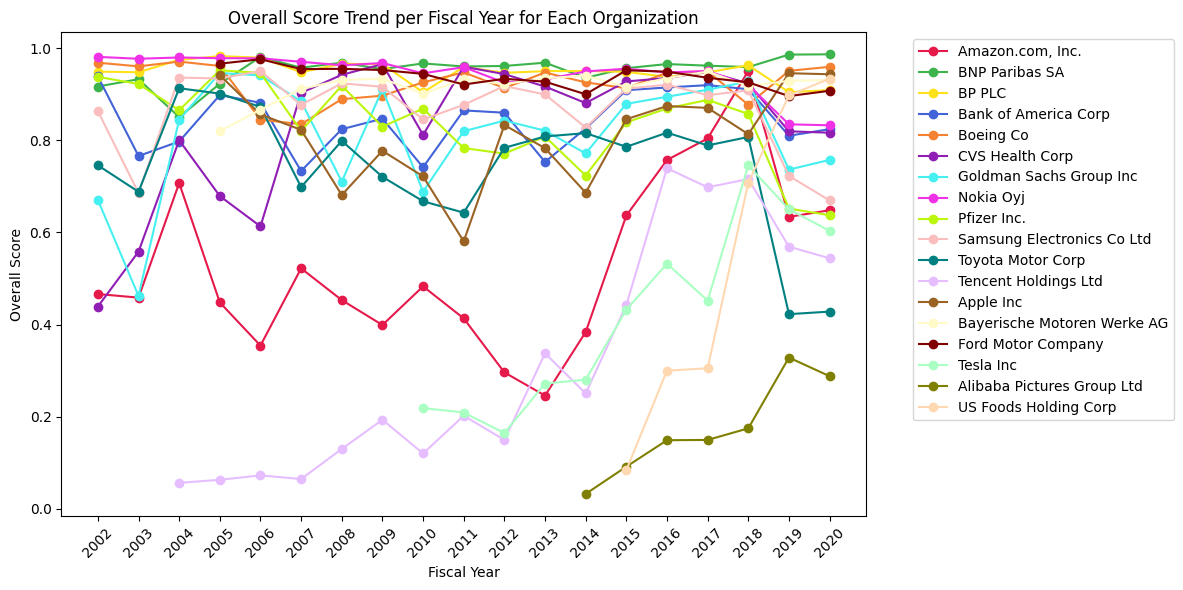

In [10]:
# Grouping data by 'FisYear' and 'OrgName' and calculating mean 'OverallScore'
grouped_scores = df.groupby(['FisYear', 'OrgName'])['overall_score'].mean().reset_index()

# Get a list of unique organization names
org_names = grouped_scores['OrgName'].unique()

# Define a color palette with a range of distinct colors
colours=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
'#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
'#000075', '#808080', '#ffffff', '#000000']

# Create a line for each organization's overall score trend across fiscal years
plt.figure(figsize=(12, 6))

# Iterate over unique organization names and plot their overall scores against fiscal years
for i, org_name in enumerate(org_names):
    data = grouped_scores[grouped_scores['OrgName'] == org_name]
    color = colours[i % len(colours)]
    # color = dark_colors(i)
    plt.plot(data['FisYear'], data['overall_score'], marker='o', label=org_name, color=color)

plt.xlabel('Fiscal Year')
plt.ylabel('Overall Score')
plt.title('Overall Score Trend per Fiscal Year for Each Organization')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(grouped_scores['FisYear'].unique().astype(int),rotation=45)  # Set integer values on x-axis
plt.yticks()  # Automatic y-axis ticks
plt.tight_layout()
plt.show()